In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [133]:
digits = load_digits()
X, y = digits.data, digits.target

In [134]:
cv = ShuffleSplit( n_splits=5, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

In [135]:
cv.get_n_splits()

5

In [136]:
train_sizes, train_scores, test_scores, fit_times, wh = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), return_times=True)

In [137]:
train_sizes

array([ 143,  467,  790, 1113, 1437])

In [138]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [139]:
test_scores

array([[0.88055556, 0.88333333, 0.85555556, 0.93333333, 0.86388889],
       [0.94166667, 0.96111111, 0.96111111, 0.95833333, 0.93333333],
       [0.95277778, 0.975     , 0.96944444, 0.98055556, 0.95277778],
       [0.98333333, 0.98333333, 0.97777778, 0.97222222, 0.96111111],
       [0.98055556, 0.98055556, 0.97222222, 0.97777778, 0.96666667]])

In [140]:
fit_times

array([[0.09051085, 0.12750888, 0.1211741 , 0.10973501, 0.10676003],
       [0.13735199, 0.13811994, 0.12975216, 0.12058115, 0.14204168],
       [0.20700312, 0.21038604, 0.20700598, 0.17854691, 0.13859606],
       [0.22559786, 0.26313686, 0.23959994, 0.20103192, 0.19570994],
       [0.27009892, 0.27719116, 0.23704815, 0.24605608, 0.21400499]])

In [141]:
wh

array([[0.06328416, 0.00793409, 0.00781584, 0.00783992, 0.00772691],
       [0.00851512, 0.00847507, 0.01284385, 0.00848603, 0.00825906],
       [0.01195002, 0.01664209, 0.00862098, 0.00895691, 0.00848794],
       [0.00924397, 0.00999308, 0.00898981, 0.01054096, 0.008847  ],
       [0.01138091, 0.00966215, 0.00879693, 0.00902796, 0.00899315]])

In [142]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [143]:
train_scores_mean

array([1., 1., 1., 1., 1.])

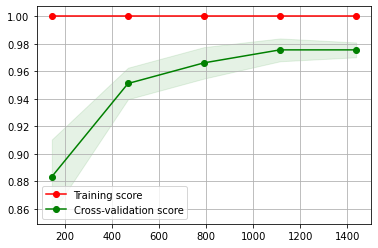

In [144]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
             train_scores_mean + train_scores_std, alpha=0.1,
             color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
             test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
     label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
     label="Cross-validation score")

plt.legend(loc="best")

In [145]:
from sklearn.metrics import f1_score
import pandas as pd
X = pd.DataFrame(X)
y = pd.DataFrame(y)

param_range = [
    {"n_estimators":10},
    {"n_estimators":20},
    {"n_estimators":40},
    {"n_estimators":60},
    {"n_estimators":80},
    {"n_estimators":100},
    ]


np_train_scores = np.empty((0, cv.n_splits))
np_test_scores = np.empty((0, cv.n_splits))
for param in param_range:
    cv_scores_train = []
    cv_scores_test = []
    estimator = RandomForestClassifier(**param)
    for train_index, test_index in cv.split(X, y):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
        clf = estimator.fit(Xtrain, ytrain)
        ypredict_train = clf.predict(Xtrain)
        ypredict = clf.predict(Xtest)
        f1_weighted_score=f1_score(ytest, ypredict, average='weighted')
        f1_weighted_score_train=f1_score(ytrain, ypredict_train, average='weighted')
        cv_scores_test.append(f1_weighted_score)
        cv_scores_train.append(f1_weighted_score_train)
    np_train_scores = np.append(np_train_scores,[cv_scores_train], axis=0)
    np_test_scores = np.append(np_test_scores,[cv_scores_test], axis=0)


/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/2414789103.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/2414789103.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/2414789103.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/2414789103.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [146]:
np_train_scores

array([[0.99930398, 1.        , 1.        , 0.99930393, 0.99930393],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [147]:
np_test_scores

array([[0.95253154, 0.94674157, 0.93586963, 0.93610798, 0.93528729],
       [0.94980956, 0.95538887, 0.9610834 , 0.96666247, 0.96130833],
       [0.97230285, 0.97478896, 0.96666423, 0.97759916, 0.97779483],
       [0.97220832, 0.98334288, 0.96656155, 0.97504868, 0.97512357],
       [0.97238777, 0.98889303, 0.96941144, 0.97223181, 0.96951804],
       [0.96946774, 0.98052477, 0.97205856, 0.9887999 , 0.98334644]])

In [148]:
np_train_scores_mean = np.mean(np_train_scores, axis=1)
np_train_scores_std = np.std(np_train_scores, axis=1)
np_test_scores_mean = np.mean(np_test_scores, axis=1)
np_test_scores_std = np.std(np_test_scores, axis=1)

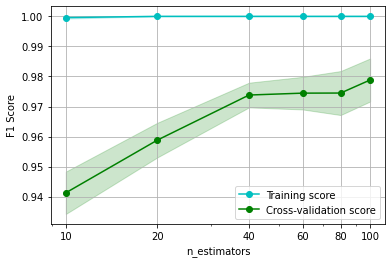

In [179]:
# Get param name and values
param_values = []
param_name = list(param_range[0].keys())[0]
for d in param_range:
    param_values.append(list(d.values())[0])

plt.grid()

plt.fill_between(param_values, np_train_scores_mean - np_train_scores_std,
             np_train_scores_mean + np_train_scores_std, alpha=0.2,
             color="c")
plt.fill_between(param_values, np_test_scores_mean - np_test_scores_std,
             np_test_scores_mean + np_test_scores_std, alpha=0.2, color="g")

# plt.plot([10,20, 40, 60, 80, 100], np_train_scores_mean, 'o-', color="c",
#      label="Training score")
#
# plt.plot([10,20, 40, 60, 80, 100], np_test_scores_mean, 'o-', color="g",
#      label="Cross-validation score")

plt.semilogx(param_values, np_train_scores_mean, 'o-', color="c",
     label="Training score")
plt.semilogx(param_values, np_test_scores_mean, 'o-', color="g",
     label="Cross-validation score")

plt.xticks(ticks=param_values, labels=[10,20, 40, 60, 80, 100])
plt.ylabel("F1 Score")
plt.xlabel(param_name)
# plt.legend(loc='upper right')
plt.legend(loc="best")

In [150]:
np_train_scores

array([[0.99930398, 1.        , 1.        , 0.99930393, 0.99930393],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [151]:
train_scores_mean

array([1., 1., 1., 1., 1.])

In [199]:
cv = ShuffleSplit( n_splits=5, test_size=0.2, random_state=0)

def plot_curve(X,
               y,
               estimator,
               cv,
               param_range):
    """
    :param X: Training set with no ground truth
    :param y: Training set ground truth only
    :param estimator: estimator instance to which parameters will be passed from param_range
    :param cv: Cross-Validation method to be used
    :param param_range: List of dictionaries containing the values for a specific parameter
    :return:
    """

    np_train_scores = np.empty((0, cv.n_splits))
    np_test_scores = np.empty((0, cv.n_splits))

    # Get param name and values
    param_values = []
    param_name = list(param_range[0].keys())[0]
    for d in param_range:
        param_values.append(list(d.values())[0])
    param_labels = param_values

    # Check if param values have string type
    if any(isinstance(item, str) for item in param_values):
        len_param_values = len(param_values)
        param_values = list(range(0,len_param_values))


    for param in param_range:
        cv_scores_train = []
        cv_scores_test = []
        # estimator = RandomForestClassifier(**param)
        # Set estimator parameters
        estimator.set_params(**param)
        for train_index, test_index in cv.split(X, y):
            Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
            ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
            clf = estimator.fit(Xtrain, ytrain)
            ypredict_train = clf.predict(Xtrain)
            ypredict = clf.predict(Xtest)
            f1_weighted_score=f1_score(ytest, ypredict, average='weighted')
            f1_weighted_score_train=f1_score(ytrain, ypredict_train, average='weighted')
            cv_scores_test.append(f1_weighted_score)
            cv_scores_train.append(f1_weighted_score_train)
        np_train_scores = np.append(np_train_scores,[cv_scores_train], axis=0)
        np_test_scores = np.append(np_test_scores,[cv_scores_test], axis=0)

    # Compute for fill_between plot
    np_train_scores_mean = np.mean(np_train_scores, axis=1)
    np_train_scores_std = np.std(np_train_scores, axis=1)
    np_test_scores_mean = np.mean(np_test_scores, axis=1)
    np_test_scores_std = np.std(np_test_scores, axis=1)
    # Plot
    plt.grid()
    plt.fill_between(param_values, np_train_scores_mean - np_train_scores_std,
                 np_train_scores_mean + np_train_scores_std, alpha=0.1,
                 color="c")
    plt.fill_between(param_values, np_test_scores_mean - np_test_scores_std,
                 np_test_scores_mean + np_test_scores_std, alpha=0.1, color="g")
    plt.semilogx(param_values, np_train_scores_mean, 'o-', color="c",
         label="Training score")
    plt.semilogx(param_values, np_test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

    # Labels and legends
    plt.xticks(ticks=param_values, labels=param_labels)
    plt.ylabel("F1 Score")
    plt.xlabel(param_name)
    # plt.legend(loc='upper right')
    plt.legend(loc="best")

    return np_train_scores, np_test_scores

In [200]:
param_range = [
    {"n_estimators":10},
    {"n_estimators":20},
    {"n_estimators":40},
    {"n_estimators":60},
    {"n_estimators":80},
    {"n_estimators":100}
    ]
param_values = []
param_name = list(param_range[0].keys())[0]
for d in param_range:
    param_values.append(list(d.values())[0])

print(param_name)
print(param_values)



n_estimators
[10, 20, 40, 60, 80, 100]


/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/3464526931.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/3464526931.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/3464526931.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = estimator.fit(Xtrain, ytrain)
/var/folders/s6/4s6hv72n5k57vyjqr8nk754c0000gn/T/ipykernel_6164/3464526931.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

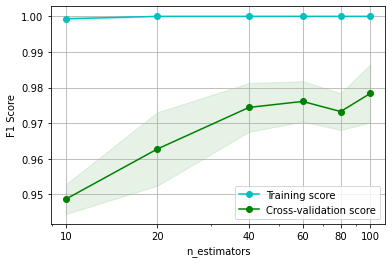

In [201]:

param_range = [
    {"criterion":"gini"},
    {"criterion":"entropy"},

    ]

param_range = [
    {"n_estimators":10},
    {"n_estimators":20},
    {"n_estimators":40},
    {"n_estimators":60},
    {"n_estimators":80},
    {"n_estimators":100}
    ]

cv2 = ShuffleSplit( n_splits=5, test_size=0.2, random_state=0)
estimator2 = RandomForestClassifier()
# digits = load_digits()
# X, y = digits.data, digits.target
# X = pd.DataFrame(X)
# y = pd.DataFrame(y)
train_score, test_score = plot_curve(X, y, estimator, cv, param_range)

In [202]:
test_score

array([[0.94137994, 0.95240928, 0.94705354, 0.9499956 , 0.95260486],
       [0.95867814, 0.96646152, 0.95825389, 0.98055595, 0.94992835],
       [0.96676007, 0.98045696, 0.9750471 , 0.98327047, 0.96664975],
       [0.98056079, 0.98334277, 0.96945006, 0.97766511, 0.96956084],
       [0.96943138, 0.97773865, 0.97208008, 0.98051537, 0.96662556],
       [0.96668782, 0.98615981, 0.97497911, 0.98890562, 0.97498866]])

In [204]:
train_score

array([[1.        , 0.99861074, 0.99860812, 1.        , 0.99930424],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])